<a href="https://colab.research.google.com/github/MatthewCurtis4/ML_Practise/blob/main/Gama_Telescope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#dataset is about a gama telescope that has a camera.
#a camera records how light hits the telescope
#and we can find patterns in it to see what type of light
#caused certain radiation (weather it was gamma or other hadron)
#there are a bunch of properties on site
#https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols) #label the columns
df.head() #display first 5 enteries

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
df["class"] = (df["class"] == "g").astype(int) #make class a 1 if g, 0 if hatron (gamma or hatron)

In [ ]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


What are we looking to do here?
- Each datapoint in the dataset is either of type gamma partical or hatron.
- Each point has stated values for each column attribute.
- These attributes are called FEATURES
- We want to pass these features into our model to help it figure out how to predict if a given datapoint that is passed in is of class gamma or hatron (called classifying).

Since we are using data to train that already have the g or h classification this is supervised learning

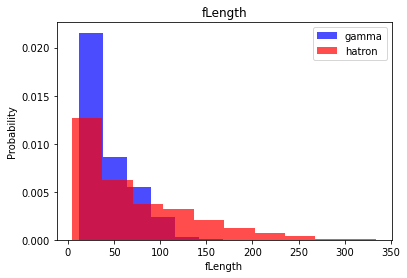

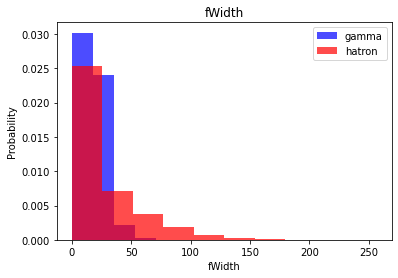

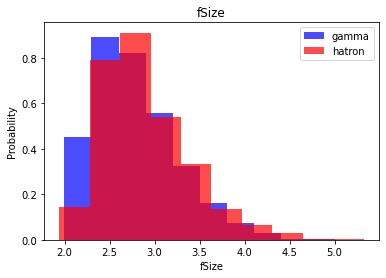

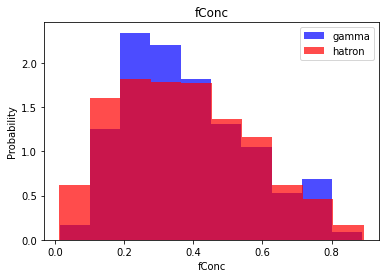

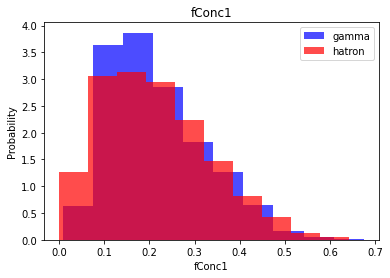

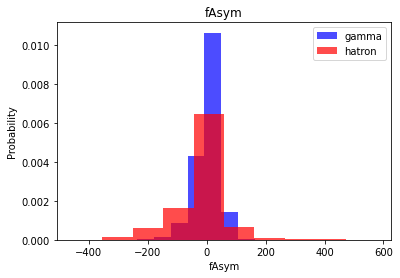

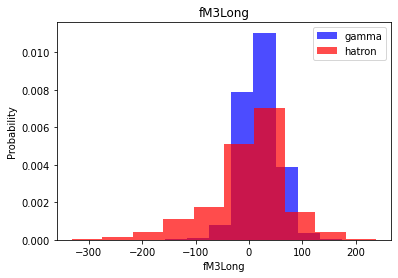

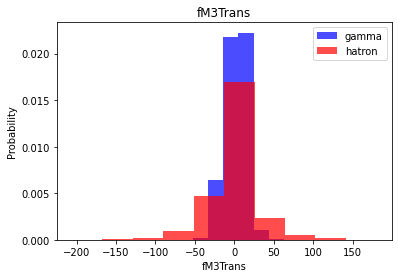

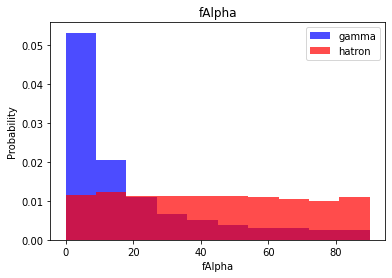

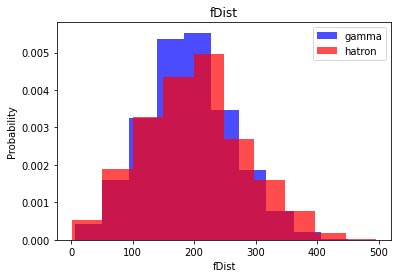

In [ ]:
for label in cols[:-1]: #all but last which is class type
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hatron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()
  #set density to true so you have a baseline to compare red vs blue. NORMALIZES THEM so they have same amount
  #easier to compare


#Train, Validation, test datasets


In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
#split off data in different sets to use as training, validation and test respectively
#first 6 percent training, then 60-80 validation, 80-100 test

Different columns have values in very different ranges
- some have values in the hundreds while others are almost all in decimal range.
- to avoid this effecting our results we need to scale them so its related to mean and deviation of given feature, not a total value.

In [ ]:
def scale_dataset(dataframe, oversample=False):

  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values 

  scaler = StandardScaler() #create scalar
  X = scaler.fit_transform(X) #take x and fit the standardized scalar to it, and transform those values respectively?
  # look more into scaler.fit_transform if desired.

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y) #TAKE MORE OF THE CLASS WITH LESS ENTERIES IN IT AND KEEP
    #SAMEPLING FROM THERE TO INCREASE SIZE OF THAT DATASET SO IT MATCHS SIZE OF BIGGER DATASET (g vs h)

  data = np.hstack((X, np.reshape(y, (len(y), 1)))) #have to reshape y since its a 1-dimensional  vector
  #len(y) is same as doing -1

  return data, X, y

In [ ]:
print (len(train[train["class"] ==1])) # gamma
print (len(train[train["class"] ==0])) # hatron
#we see that there are alot more gammas, so we need to oversample our training data set
# so we have more hatron points so they match gamma better.

7359
4053


In [ ]:
#oversample set to false for valid and test because you want to know if you have random data
#how the system will work without any oversampling or anything
train, X_train, y_train = scale_dataset(train, oversample=True)  #now above len tests will give same value
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

#kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred)) 
#precision for 1s: for all the points we labeled as class 1, how many were right 
#(correct 1s/tot num labeled as 1s)
#recall for 1s: out of all the ones we know are calss 1, how many did we get right 
#(correct 1s label/total num of 1s)

              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1343
           1       0.86      0.84      0.85      2461

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



#Naive Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [ ]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.43      0.53      1343
           1       0.74      0.90      0.81      2461

    accuracy                           0.73      3804
   macro avg       0.72      0.66      0.67      3804
weighted avg       0.73      0.73      0.71      3804



#Log Regression
Good demo of how it was derived

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression() #you can use different parameters like penalties for LogisticRegression
#hover over LogisticRegression() to see parameters, we are using it out of the box here though
lg_model = lg_model.fit(X_train, y_train)

In [ ]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.70      0.70      1343
           1       0.84      0.83      0.83      2461

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



#SVG
#weakness: outliers can throw it off largely
- focus on not only seperating the two classes well
- but also focusing on having a good bountry for margins (care about the boundary inbetween and where it lies. This matters alot for when new data is added and needs to be determined what to do with it)
- margins is the distance from the boundary line to the closest point on either side of the boundary (this would be in an example with only one feature and two classes. A boundary would be distance from boundrary line to closest A, vice versa for B). These close points are called support vectors
- SO FIND LINE THAT SEPERATES THE TWO CLASSES THE BEST BUT ALSO THAT MAXIMIZES THE MARGINS
- issue with SVG is there bad with outliers. So one outlier may be used as a support vector when it isnt actually represenative of the class.

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()#again, if your doing a production level model, you would fiddle with SVC() parameters.
#play around with these parameters in actually practise to see if you can imporve f1 score
svm_model = svm_model.fit(X_train, y_train)

In [ ]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1343
           1       0.89      0.89      0.89      2461

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



In [ ]:
#Neural Net
#Normally the best


In [ ]:
import tensorflow as tf

In [ ]:
#these plots imported from tensorflow tutorials
#modified to make them plotted next to each other
#left is the loss
#right is accuracy
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [ ]:
#a lot of the process of using neural nets is figuring out what variable produce the best result
#this is why we have the training and network creation in a function to test out values.
#then look at charts we made below to see best options
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])


  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


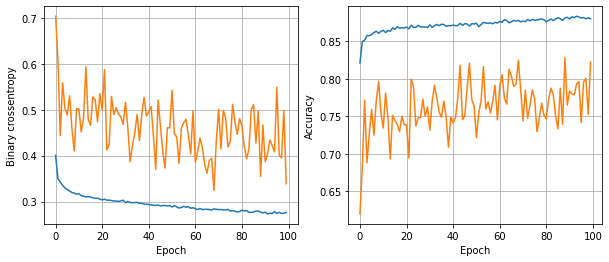

119/119 [==============================] - 0s 1ms/step - loss: 0.3564 - accuracy: 0.8562
16 nodes, dropout 0, lr 0.01, batch size 64


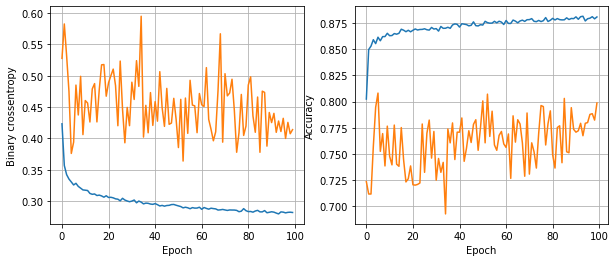

119/119 [==============================] - 0s 2ms/step - loss: 0.3499 - accuracy: 0.8675
16 nodes, dropout 0, lr 0.01, batch size 128


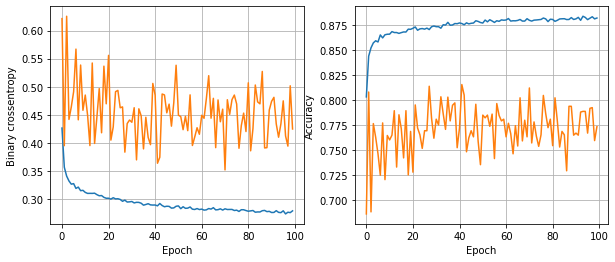

119/119 [==============================] - 0s 2ms/step - loss: 0.3262 - accuracy: 0.8730
16 nodes, dropout 0, lr 0.005, batch size 32


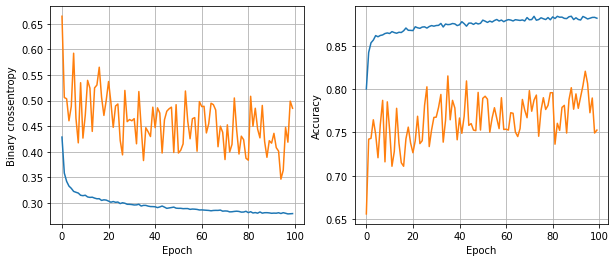

119/119 [==============================] - 0s 2ms/step - loss: 0.3144 - accuracy: 0.8807
16 nodes, dropout 0, lr 0.005, batch size 64


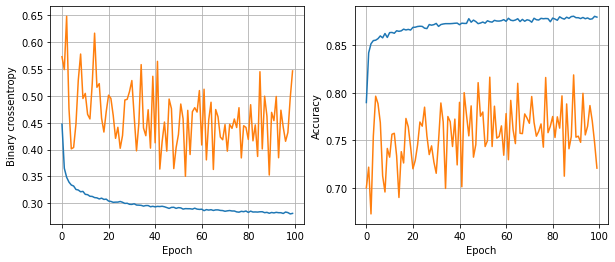

119/119 [==============================] - 0s 1ms/step - loss: 0.3198 - accuracy: 0.8736
16 nodes, dropout 0, lr 0.005, batch size 128


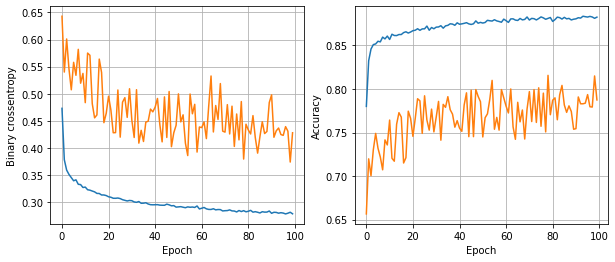

119/119 [==============================] - 0s 2ms/step - loss: 0.3243 - accuracy: 0.8688
16 nodes, dropout 0, lr 0.001, batch size 32


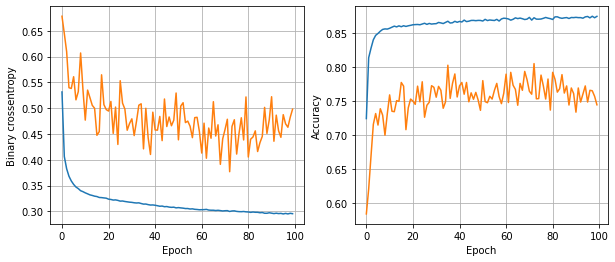

119/119 [==============================] - 0s 1ms/step - loss: 0.3087 - accuracy: 0.8757
16 nodes, dropout 0, lr 0.001, batch size 64


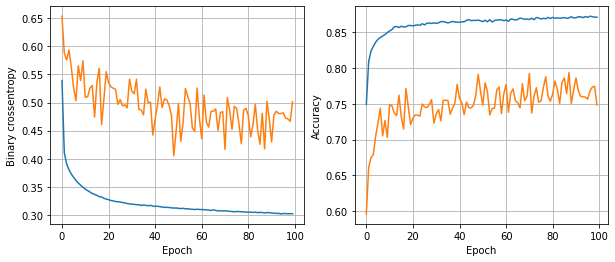

119/119 [==============================] - 1s 6ms/step - loss: 0.3179 - accuracy: 0.8767
16 nodes, dropout 0, lr 0.001, batch size 128


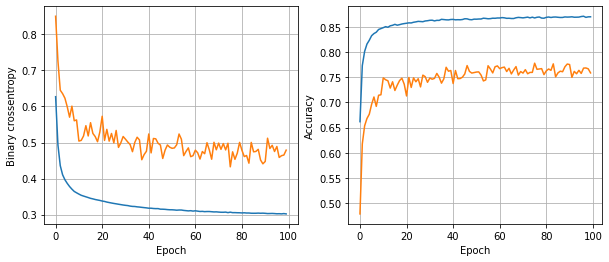

119/119 [==============================] - 0s 2ms/step - loss: 0.3129 - accuracy: 0.8764
16 nodes, dropout 0.2, lr 0.01, batch size 32


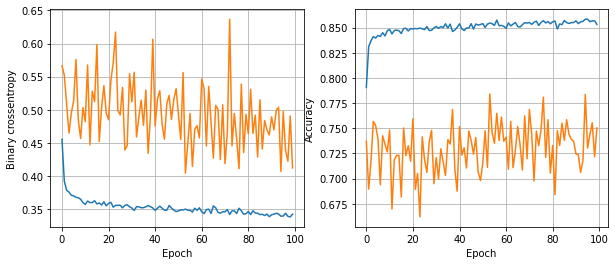

119/119 [==============================] - 0s 2ms/step - loss: 0.3410 - accuracy: 0.8759
16 nodes, dropout 0.2, lr 0.01, batch size 64


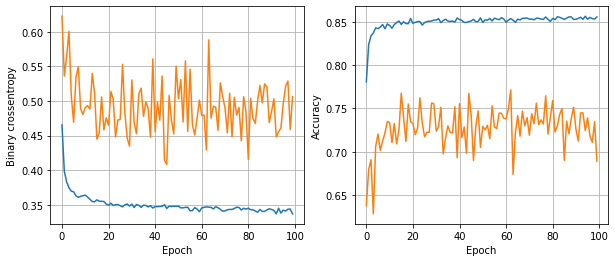

119/119 [==============================] - 0s 2ms/step - loss: 0.3134 - accuracy: 0.8733
16 nodes, dropout 0.2, lr 0.01, batch size 128


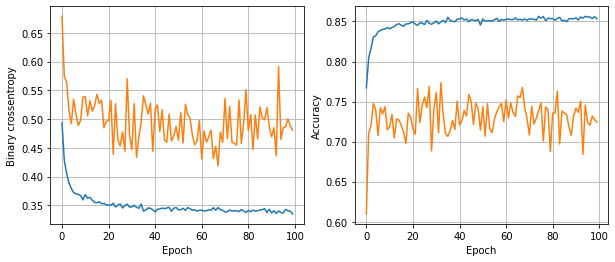

119/119 [==============================] - 1s 4ms/step - loss: 0.3170 - accuracy: 0.8738
16 nodes, dropout 0.2, lr 0.005, batch size 32


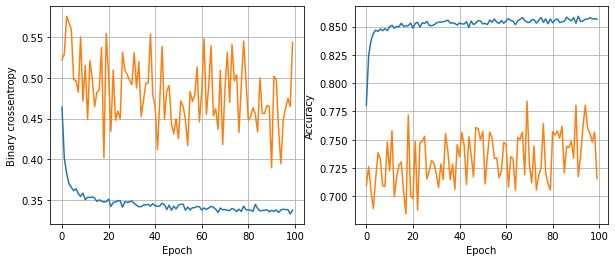

119/119 [==============================] - 0s 2ms/step - loss: 0.3046 - accuracy: 0.8780
16 nodes, dropout 0.2, lr 0.005, batch size 64


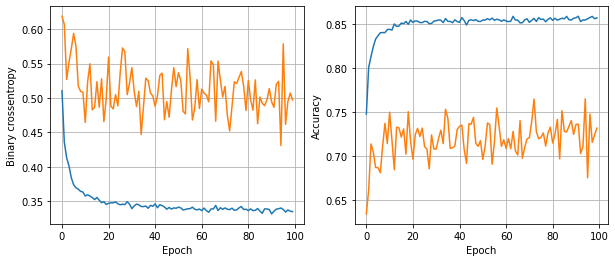

119/119 [==============================] - 1s 4ms/step - loss: 0.3148 - accuracy: 0.8743
16 nodes, dropout 0.2, lr 0.005, batch size 128


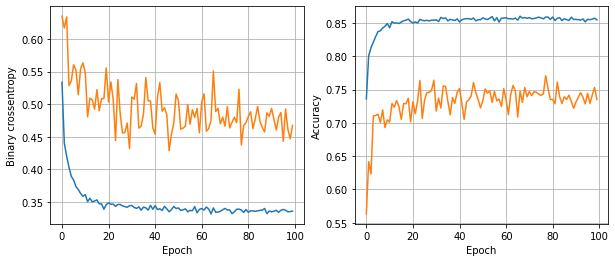

119/119 [==============================] - 0s 2ms/step - loss: 0.3167 - accuracy: 0.8772
16 nodes, dropout 0.2, lr 0.001, batch size 32


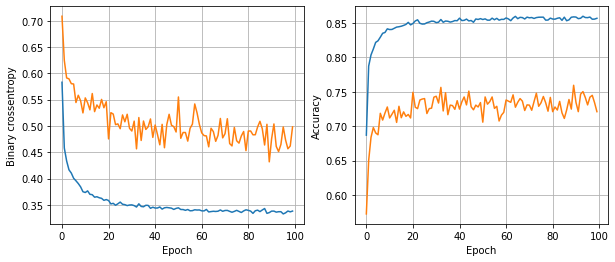

119/119 [==============================] - 0s 2ms/step - loss: 0.3103 - accuracy: 0.8780
16 nodes, dropout 0.2, lr 0.001, batch size 64


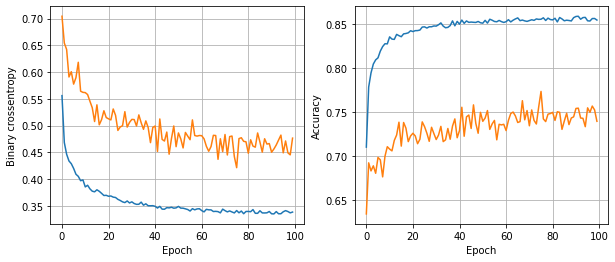

119/119 [==============================] - 0s 2ms/step - loss: 0.3127 - accuracy: 0.8772
16 nodes, dropout 0.2, lr 0.001, batch size 128


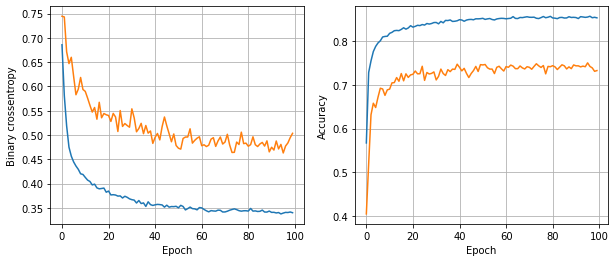

119/119 [==============================] - 0s 2ms/step - loss: 0.3155 - accuracy: 0.8746
32 nodes, dropout 0, lr 0.01, batch size 32


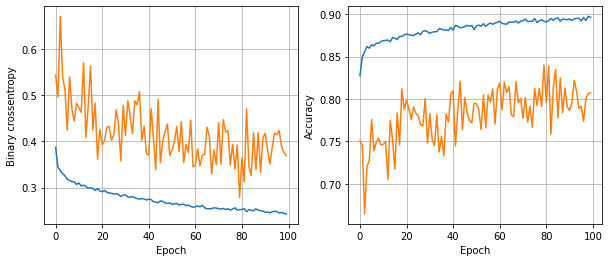

119/119 [==============================] - 0s 2ms/step - loss: 0.3592 - accuracy: 0.8701
32 nodes, dropout 0, lr 0.01, batch size 64


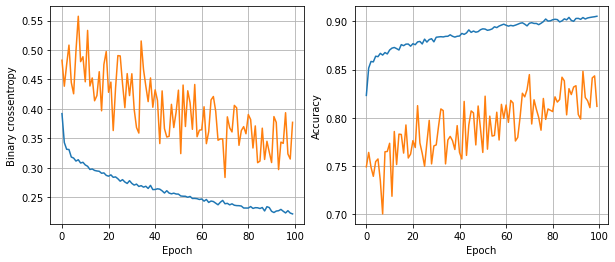

119/119 [==============================] - 0s 2ms/step - loss: 0.4130 - accuracy: 0.8633
32 nodes, dropout 0, lr 0.01, batch size 128


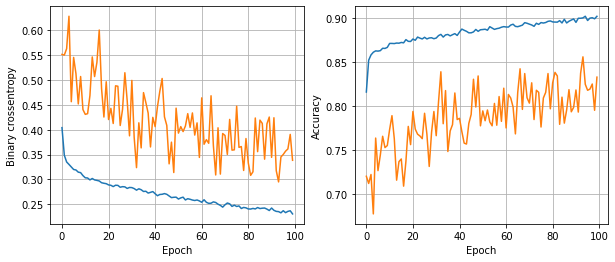

119/119 [==============================] - 0s 2ms/step - loss: 0.3934 - accuracy: 0.8588
32 nodes, dropout 0, lr 0.005, batch size 32


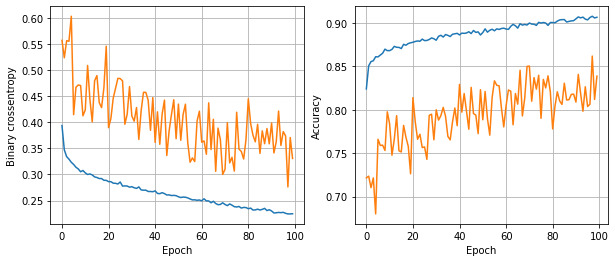

119/119 [==============================] - 0s 2ms/step - loss: 0.3828 - accuracy: 0.8654
32 nodes, dropout 0, lr 0.005, batch size 64


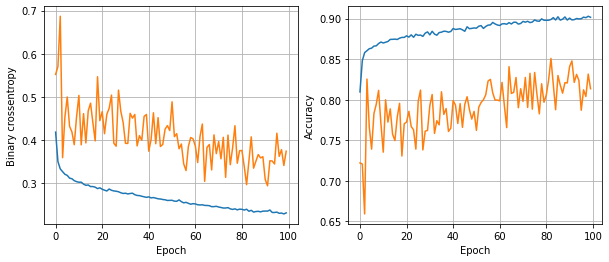

119/119 [==============================] - 1s 6ms/step - loss: 0.3820 - accuracy: 0.8675
32 nodes, dropout 0, lr 0.005, batch size 128


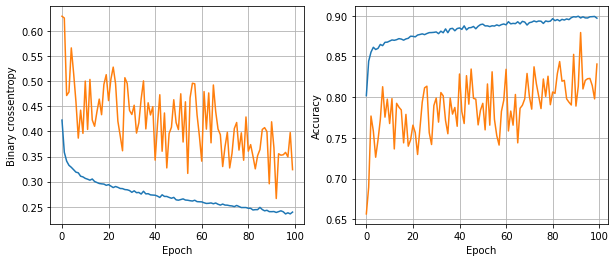

119/119 [==============================] - 0s 2ms/step - loss: 0.3789 - accuracy: 0.8630
32 nodes, dropout 0, lr 0.001, batch size 32


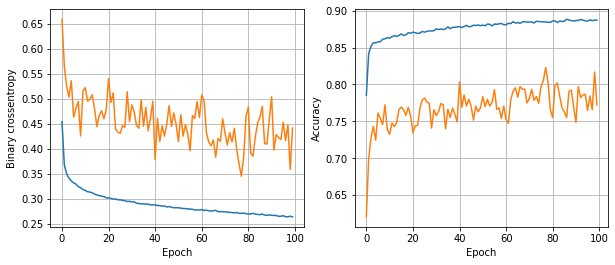

119/119 [==============================] - 0s 2ms/step - loss: 0.3204 - accuracy: 0.8733
32 nodes, dropout 0, lr 0.001, batch size 64


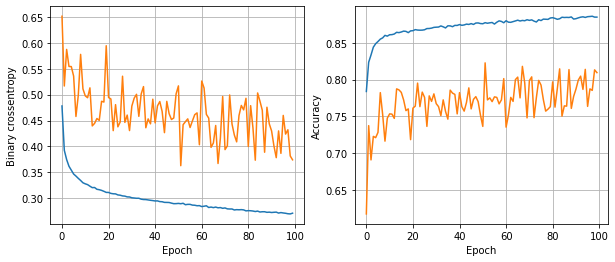

119/119 [==============================] - 0s 2ms/step - loss: 0.3228 - accuracy: 0.8701
32 nodes, dropout 0, lr 0.001, batch size 128


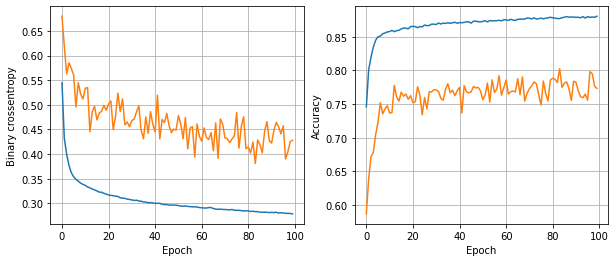

119/119 [==============================] - 0s 2ms/step - loss: 0.3222 - accuracy: 0.8749
32 nodes, dropout 0.2, lr 0.01, batch size 32


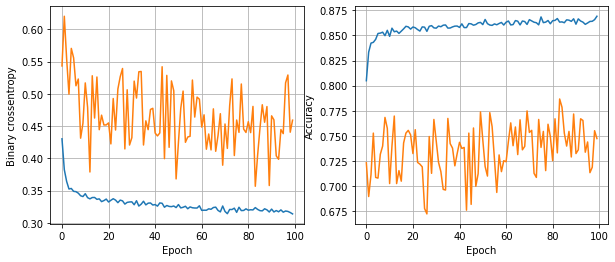

119/119 [==============================] - 1s 5ms/step - loss: 0.3135 - accuracy: 0.8791
32 nodes, dropout 0.2, lr 0.01, batch size 64


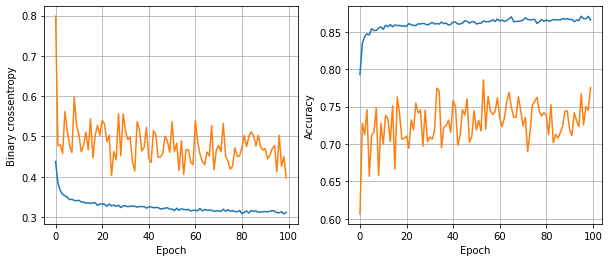

119/119 [==============================] - 0s 2ms/step - loss: 0.3219 - accuracy: 0.8738
32 nodes, dropout 0.2, lr 0.01, batch size 128


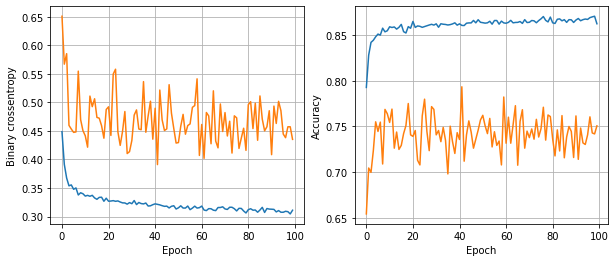

119/119 [==============================] - 1s 6ms/step - loss: 0.3093 - accuracy: 0.8791
32 nodes, dropout 0.2, lr 0.005, batch size 32


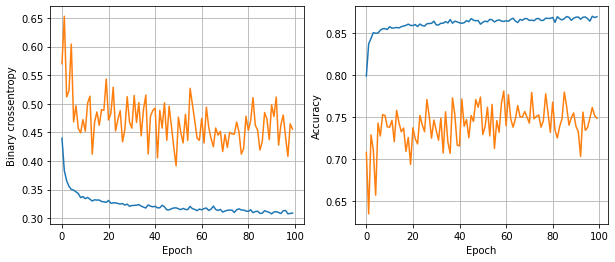

119/119 [==============================] - 1s 4ms/step - loss: 0.3061 - accuracy: 0.8822
32 nodes, dropout 0.2, lr 0.005, batch size 64


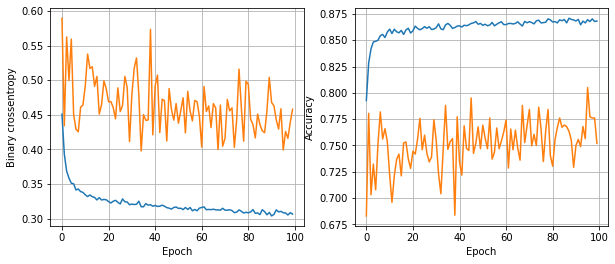

119/119 [==============================] - 0s 2ms/step - loss: 0.3051 - accuracy: 0.8785
32 nodes, dropout 0.2, lr 0.005, batch size 128


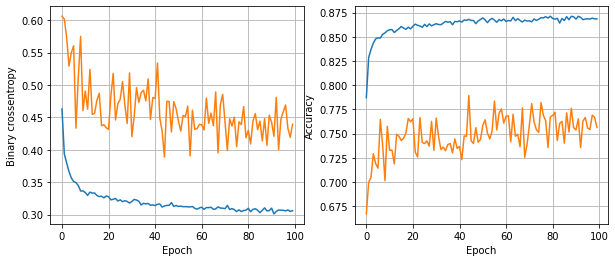

119/119 [==============================] - 0s 2ms/step - loss: 0.3086 - accuracy: 0.8770
32 nodes, dropout 0.2, lr 0.001, batch size 32


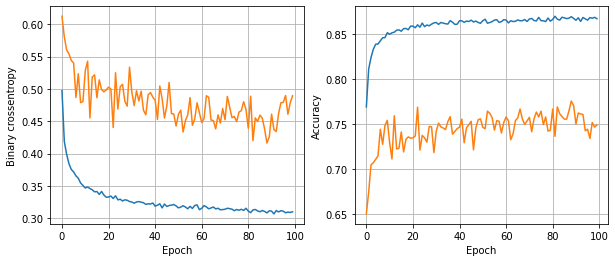

119/119 [==============================] - 0s 2ms/step - loss: 0.3041 - accuracy: 0.8746
32 nodes, dropout 0.2, lr 0.001, batch size 64


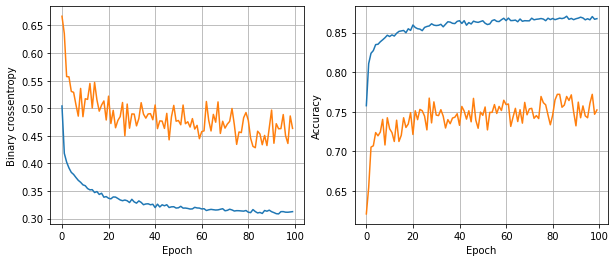

119/119 [==============================] - 0s 2ms/step - loss: 0.3015 - accuracy: 0.8830
32 nodes, dropout 0.2, lr 0.001, batch size 128


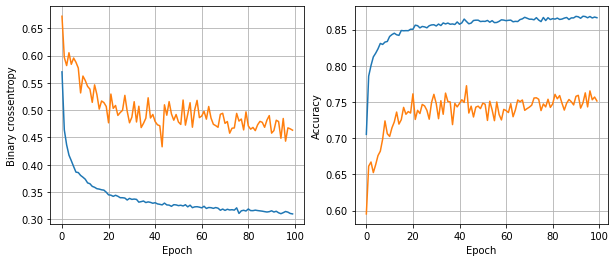

119/119 [==============================] - 0s 2ms/step - loss: 0.3066 - accuracy: 0.8785
64 nodes, dropout 0, lr 0.01, batch size 32


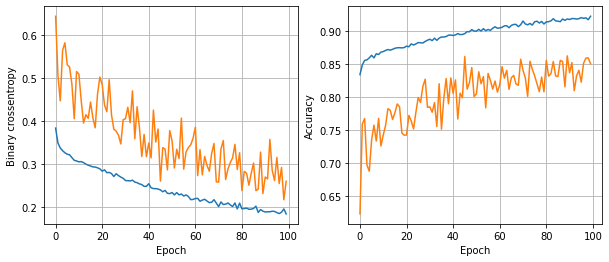

119/119 [==============================] - 0s 2ms/step - loss: 0.5116 - accuracy: 0.8638
64 nodes, dropout 0, lr 0.01, batch size 64


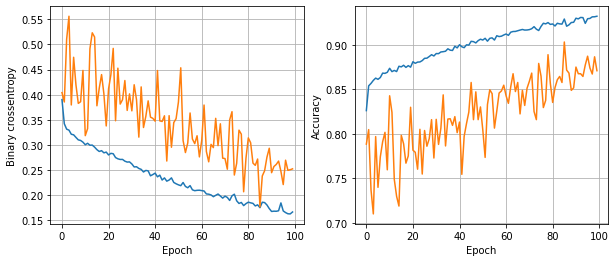

119/119 [==============================] - 0s 2ms/step - loss: 0.5043 - accuracy: 0.8604
64 nodes, dropout 0, lr 0.01, batch size 128


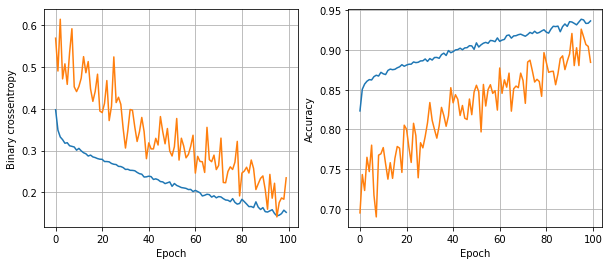

119/119 [==============================] - 0s 2ms/step - loss: 0.6040 - accuracy: 0.8583
64 nodes, dropout 0, lr 0.005, batch size 32


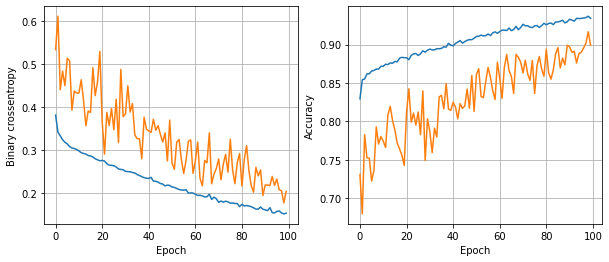

119/119 [==============================] - 0s 2ms/step - loss: 0.5825 - accuracy: 0.8502
64 nodes, dropout 0, lr 0.005, batch size 64


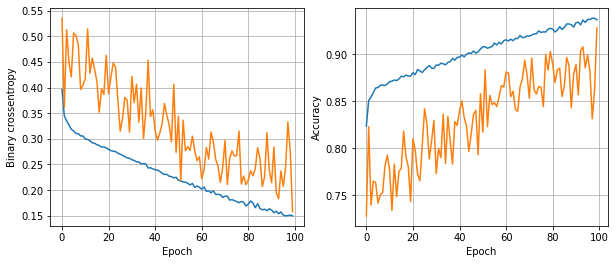

119/119 [==============================] - 0s 2ms/step - loss: 0.5779 - accuracy: 0.8504
64 nodes, dropout 0, lr 0.005, batch size 128


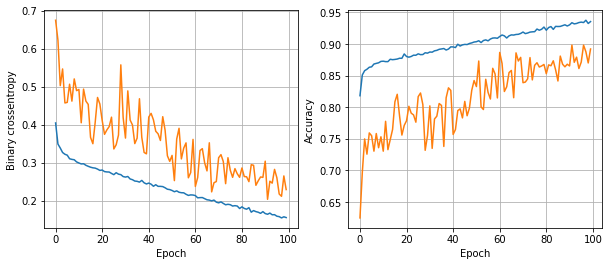

119/119 [==============================] - 0s 2ms/step - loss: 0.4941 - accuracy: 0.8633
64 nodes, dropout 0, lr 0.001, batch size 32


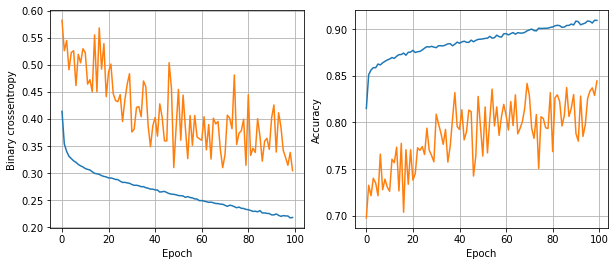

119/119 [==============================] - 0s 2ms/step - loss: 0.3531 - accuracy: 0.8630
64 nodes, dropout 0, lr 0.001, batch size 64


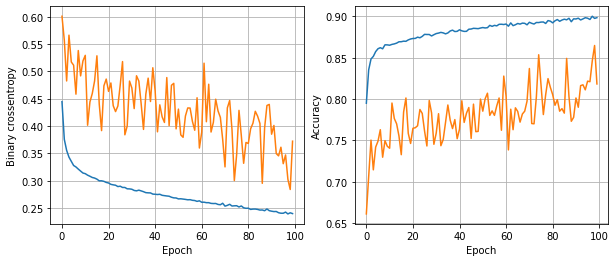

119/119 [==============================] - 0s 2ms/step - loss: 0.3467 - accuracy: 0.8686
64 nodes, dropout 0, lr 0.001, batch size 128


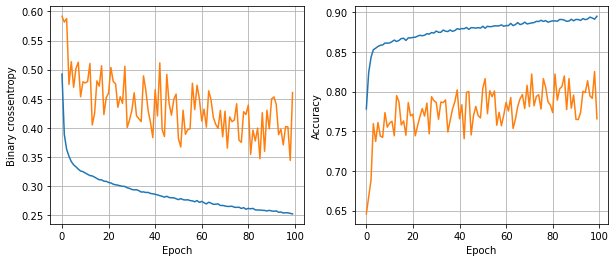

119/119 [==============================] - 1s 4ms/step - loss: 0.3262 - accuracy: 0.8757
64 nodes, dropout 0.2, lr 0.01, batch size 32


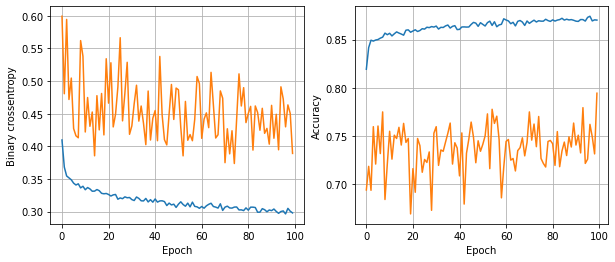

119/119 [==============================] - 0s 2ms/step - loss: 0.3682 - accuracy: 0.8783
64 nodes, dropout 0.2, lr 0.01, batch size 64


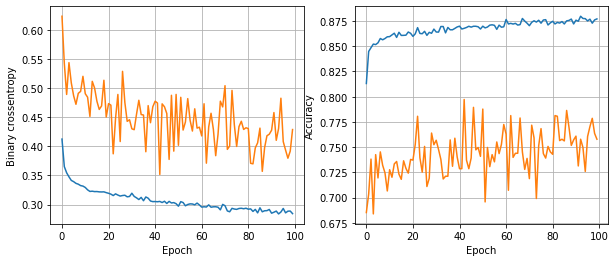

119/119 [==============================] - 0s 2ms/step - loss: 0.3124 - accuracy: 0.8833
64 nodes, dropout 0.2, lr 0.01, batch size 128


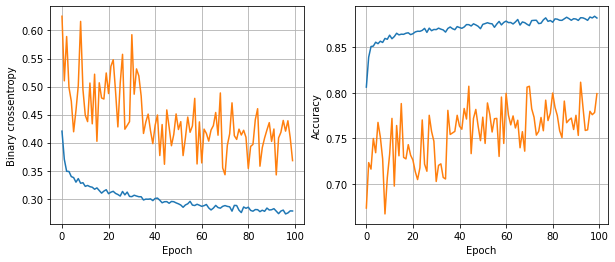

119/119 [==============================] - 0s 2ms/step - loss: 0.3224 - accuracy: 0.8801
64 nodes, dropout 0.2, lr 0.005, batch size 32


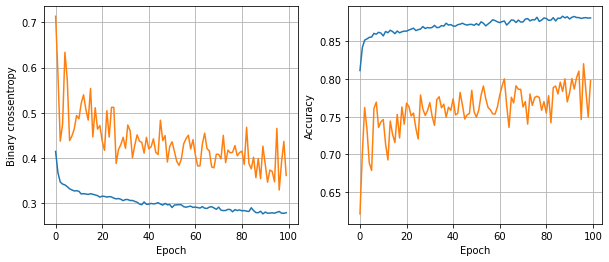

119/119 [==============================] - 0s 2ms/step - loss: 0.3203 - accuracy: 0.8722
64 nodes, dropout 0.2, lr 0.005, batch size 64


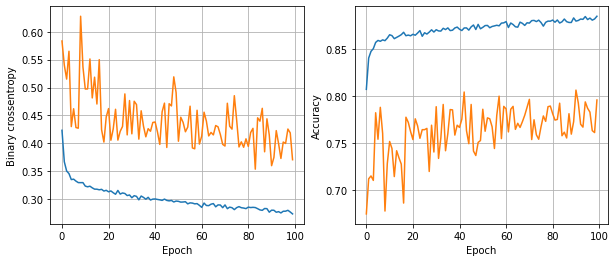

119/119 [==============================] - 0s 2ms/step - loss: 0.3130 - accuracy: 0.8804
64 nodes, dropout 0.2, lr 0.005, batch size 128


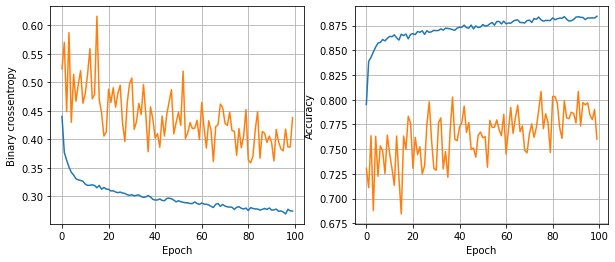

119/119 [==============================] - 0s 2ms/step - loss: 0.2948 - accuracy: 0.8849
64 nodes, dropout 0.2, lr 0.001, batch size 32


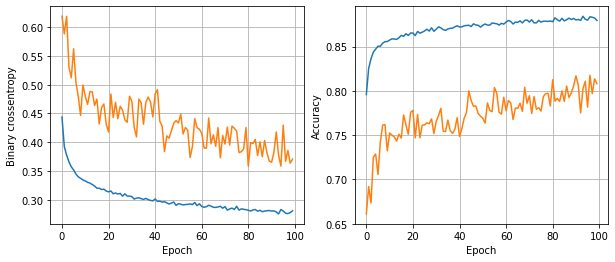

119/119 [==============================] - 0s 2ms/step - loss: 0.3013 - accuracy: 0.8772
64 nodes, dropout 0.2, lr 0.001, batch size 64


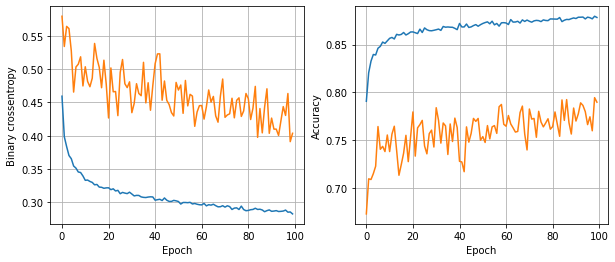

119/119 [==============================] - 0s 2ms/step - loss: 0.3114 - accuracy: 0.8793
64 nodes, dropout 0.2, lr 0.001, batch size 128


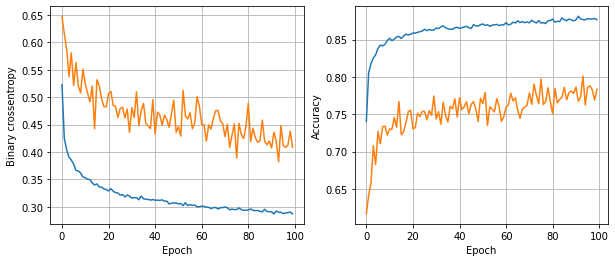

119/119 [==============================] - 0s 2ms/step - loss: 0.3022 - accuracy: 0.8788


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [ ]:
#this takes the least loss model, aka the model with parameters that results in the smallest loss value.
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

NameError: ignored

In [ ]:
print(classification_report(y_test, y_pred))